In [1]:
%matplotlib inline
from physt import histogram

## Creating a histogram

In [2]:
# Basic dataset
heights = [160, 155, 156, 198, 177, 168, 191, 183, 184, 179, 178, 172, 173, 175,
           172, 177, 176, 175, 174, 173, 174, 175, 177, 169, 168, 164, 175, 188,
           178, 174, 173, 181, 185, 166, 162, 163, 171, 165, 180, 189, 166, 163,
           172, 173, 174, 183, 184, 161, 162, 168, 169, 174, 176, 170, 169, 165]

hist = histogram(heights, 10)

## Plotting

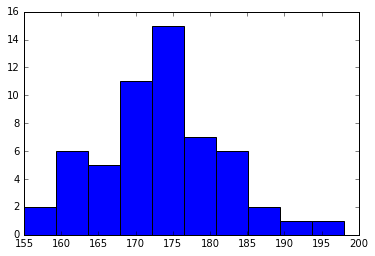

In [3]:
hist.plot();

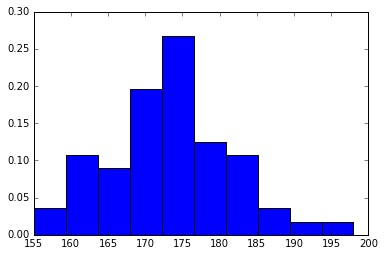

In [4]:
hist.plot(density=True);

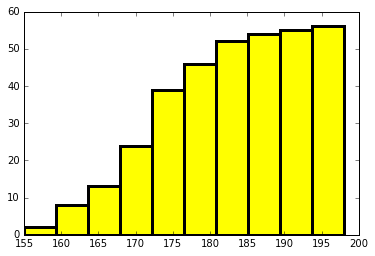

In [5]:
hist.plot(cumulative=True, color="yellow", lw=3);

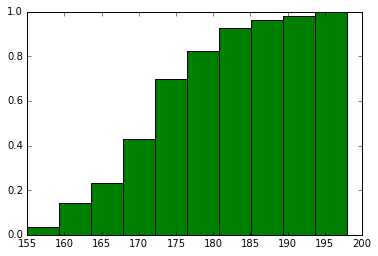

In [6]:
hist.plot(cumulative=True, density=True, color="green");

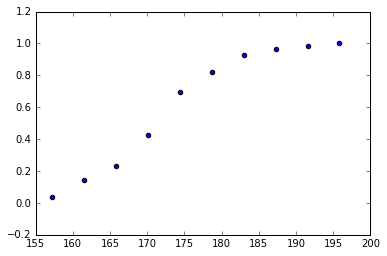

In [7]:
hist.plot(histtype="scatter", cumulative=True, density=True);